In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle.json': b'{"username":"saikoushikpentyala","key":"1ddca6d8ac32ded7f92b733d9bc7584d"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 74 May  7 07:09 kaggle.json
{"username":"saikoushikpentyala","key":"1ddca6d8ac32ded7f92b733d9bc7584d"}

In [4]:
!sudo apt-get install python-lxml


Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-lxml is already the newest version (4.5.0-1ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [5]:
!pip install -q kaggle

In [6]:
!kaggle datasets download -d moltean/fruits

fruits.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip fruits.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Traini

In [8]:
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals
print("Keras Version: ", tf.keras.__version__)

Keras Version:  2.12.0


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
train_dir = '/content/fruits-360-original-size/fruits-360-original-size/Training'

In [11]:
test_dir = '/content/fruits-360-original-size/fruits-360-original-size/Test'

# load these images off disk using image_dataset_from_directory
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory
Old solution: Use ImageDataGenerator to rescale the images: https://keras.io/preprocessing/image/

In [12]:
base_dir = '/'
print(base_dir)

/


In [13]:
batch_size = 32
img_height = 128 #180
img_width = 128 #180

In [14]:
# Establishes a Pipe line instead of loading the dataset directly
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6231 files belonging to 24 classes.
Using 4985 files for training.


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
class_names = train_ds.class_names
print(class_names)

['apple_6', 'apple_braeburn_1', 'apple_crimson_snow_1', 'apple_golden_1', 'apple_golden_2', 'apple_golden_3', 'apple_granny_smith_1', 'apple_hit_1', 'apple_pink_lady_1', 'apple_red_1', 'apple_red_2', 'apple_red_3', 'apple_red_delicios_1', 'apple_red_yellow_1', 'apple_rotten_1', 'cabbage_white_1', 'carrot_1', 'cucumber_1', 'cucumber_3', 'eggplant_violet_1', 'pear_1', 'pear_3', 'zucchini_1', 'zucchini_dark_1']


In [17]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6231 files belonging to 24 classes.
Using 1246 files for validation.


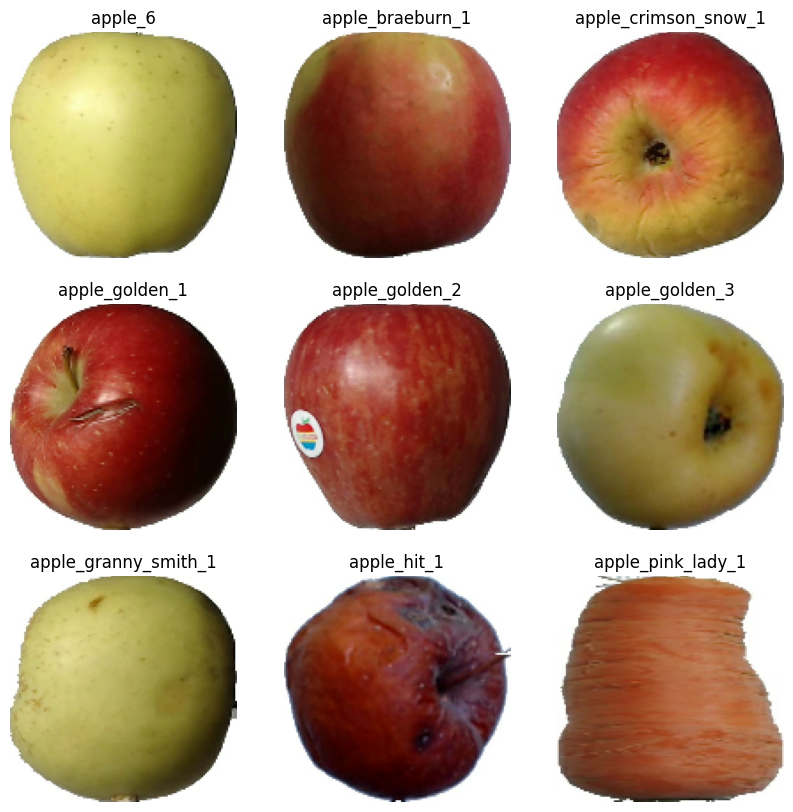

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, groundlabels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[i])
    plt.axis("off")

In [19]:
#manually iterate over the dataset and retrieve batches of images:
#This is a batch of 32 images of shape 180x180x3 (the last dimension referes to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [20]:
# number of batches
train_ds.cardinality().numpy()

156

In [21]:
batch_size = 32
img_height = 128
img_width = 128
IMG_SIZE = (img_height, img_width)
IMG_SHAPE = IMG_SIZE + (3,)
num_classes = 131

In [22]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [23]:
def getModel(base_model,preprocess_input):
    batch_size = 32
    img_height = 128
    img_width = 128
    IMG_SIZE = (img_height, img_width)
    IMG_SHAPE = IMG_SIZE + (3,)
    num_classes = 131
    
    data_augmentation = tf.keras.Sequential([
      tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
      tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    ])
    

    base_model.trainable = False
    
    header = tf.keras.Sequential([
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(num_classes, activation='softmax', dtype=tf.float32) 
    ])
    
    inputs = tf.keras.Input(shape=IMG_SHAPE)
    x = data_augmentation(inputs)
    x = preprocess_input(x)
    x = base_model(x, training=False)
    outputs = header(x)
    model = tf.keras.Model(inputs, outputs)
    base_learning_rate = 0.0001
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model

In [24]:
def getFineTuneModel(model,fine_tune_at):
  model_base=model.layers[4]
  for layer in model.layers[4].layers[fine_tune_at:]:
    layer.trainable =  True
  base_learning_rate = 0.0001
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate/10),
          #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
          loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy'])
  return model

In [25]:
def plot_history(history, metric, val_metric):
  acc = history.history[metric]
  val_acc = history.history[val_metric]

  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs_range = range(len(acc))

  fig=plt.figure(figsize=(12, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylim([min(plt.ylim()),1])
  plt.grid(True)
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.grid(True)
  plt.title('Training and Validation Loss')
  plt.show()
  fig.savefig('traininghistory.pdf')

In [26]:
def plotHistoryFinetune(history,history_finetune,initial_epochs):
  acc = history.history['accuracy']
  acc += history_finetune.history['accuracy']

  val_acc = history.history['val_accuracy']
  val_acc += history_finetune.history['val_accuracy']

  loss = history.history['loss']
  loss += history_finetune.history['loss']

  val_loss = history.history['val_loss']
  val_loss += history_finetune.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.ylim([0.8, 1])
  plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.ylim([0, 1.0])
  plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()


In [27]:
def trainTLModel(base_model,preprocess_input,fine_tune_at,train_ds,val_ds):
  model = getModel(base_model,preprocess_input)
  newModel = model
  fineTuneModel = getFineTuneModel(newModel,fine_tune_at)
  # Transfer Learning:
  #loss0, accuracy0 = model.evaluate(val_ds)
  history = model.fit(train_ds,
                    epochs=10,
                    validation_data=val_ds)
  #Fine Tuning
  #loss1, accuracy1 = fineTuneModel.evaluate(val_ds)
  fine_tune_epochs = 20
  initial_epochs = 10
  total_epochs =  initial_epochs + fine_tune_epochs
  history_finetune = fineTuneModel.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds)
  plotHistoryFinetune(history,history_finetune,initial_epochs)
  return [history,history_finetune,model,fineTuneModel]


In [28]:
vgg_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
preprocess_input = tf.keras.applications.vgg16.preprocess_input

vgg_tl_model = getModel(vgg_model,preprocess_input)

In [29]:
vgg_tl_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 128, 128, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 128, 128, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 sequential_1 (Sequential)   (None, 131)               67203     
                                                             

In [30]:
vgg_fine_tune_model = getFineTuneModel(vgg_tl_model,100)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


156/156 [==============================] - 8s 22ms/step - loss: 5.8239 - accuracy: 0.4630 - val_loss: 0.7053 - val_accuracy: 0.8451
Epoch 2/10
156/156 [==============================] - 2s 13ms/step - loss: 0.9064 - accuracy: 0.8156 - val_loss: 0.2085 - val_accuracy: 0.9342
Epoch 3/10
156/156 [==============================] - 2s 13ms/step - loss: 0.4451 - accuracy: 0.8901 - val_loss: 0.1013 - val_accuracy: 0.9623
Epoch 4/10
156/156 [==============================] - 2s 13ms/step - loss: 0.2430 - accuracy: 0.9296 - val_loss: 0.0860 - val_accuracy: 0.9679
Epoch 5/10
156/156 [==============================] - 2s 13ms/step - loss: 0.1675 - accuracy: 0.9494 - val_loss: 0.0734 - val_accuracy: 0.9695
Epoch 6/10
156/156 [==============================] - 2s 13ms/step - loss: 0.1516 - accuracy: 0.9577 - val_loss: 0.0297 - val_accuracy: 0.9888
Epoch 7/10
156/156 [==============================] - 2s 13ms/step - loss: 0.1054 - accuracy: 0.9663 - val_loss: 0.0210 - val_accuracy: 0.9944
Epoch 8/10

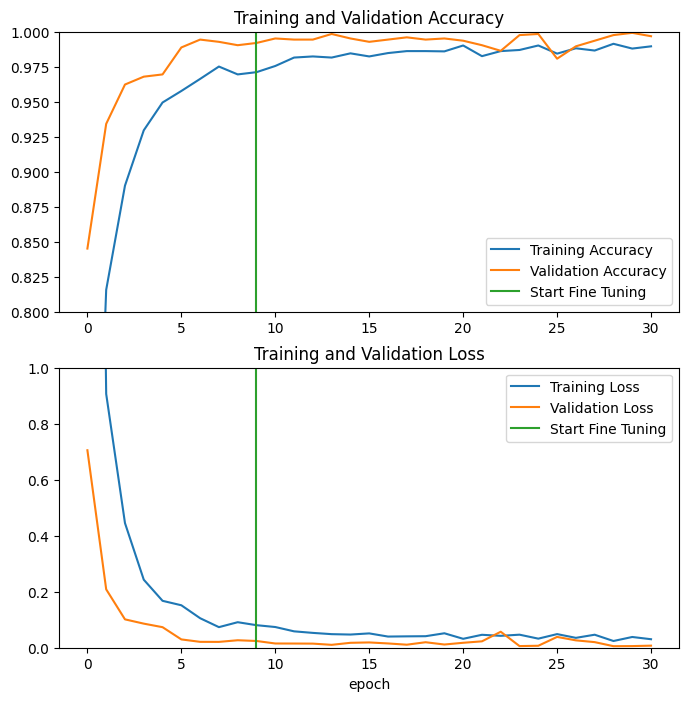

In [31]:
[history,history_finetune,tl_model,fineTuneModel] = trainTLModel(vgg_model,preprocess_input,100,train_ds,val_ds)

In [32]:
fineTuneModel.save('saved_models/vgg16model_finetune/', save_format='tf')

In [33]:
tl_model.save('saved_models/vgg16model_transferlearning/', save_format='tf')

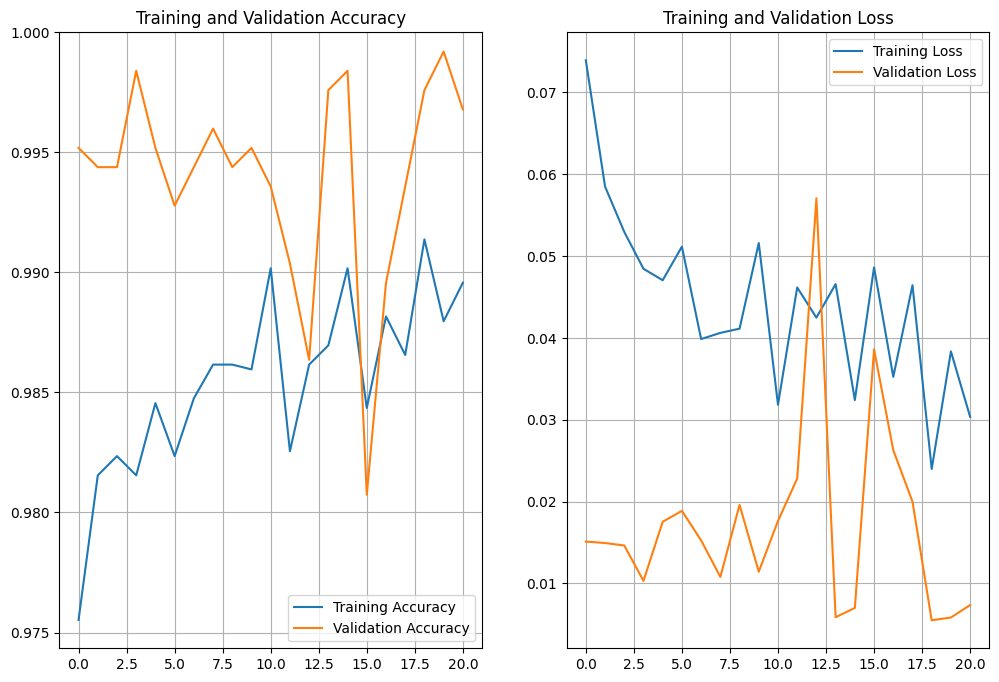

In [34]:
plot_history(history_finetune,"accuracy","val_accuracy")